# IMPORT LIBRARIES


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

# Import data + Exploration and Cleaning


In [3]:
df = pd.read_csv('./WMT.csv')

In [4]:
df.shape

(6118, 7)

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/3/2000,22.791668,23.000000,21.833332,22.270832,14.469358,25109700
1,1/4/2000,21.833332,21.937500,21.395832,21.437500,13.927947,20235300
2,1/5/2000,21.291668,21.458332,20.729168,21.000000,13.643703,21056100
3,1/6/2000,21.000000,21.520832,20.895832,21.229168,13.792585,19633500
4,1/7/2000,21.500000,22.979168,21.500000,22.833332,14.834813,23930700
...,...,...,...,...,...,...,...
6113,4/22/2024,59.560001,60.400002,59.040001,60.139999,60.139999,14910000
6114,4/23/2024,60.250000,60.349998,58.560001,59.090000,59.090000,17963900
6115,4/24/2024,58.980000,60.040001,58.810001,59.869999,59.869999,18529100
6116,4/25/2024,60.049999,60.529999,59.830002,60.209999,60.209999,19263000


In [8]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [9]:
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [11]:
df.describe

<bound method NDFrame.describe of            Date       Open       High        Low      Close  Adj Close  \
0    2000-01-03  22.791668  23.000000  21.833332  22.270832  14.469358   
1    2000-01-04  21.833332  21.937500  21.395832  21.437500  13.927947   
2    2000-01-05  21.291668  21.458332  20.729168  21.000000  13.643703   
3    2000-01-06  21.000000  21.520832  20.895832  21.229168  13.792585   
4    2000-01-07  21.500000  22.979168  21.500000  22.833332  14.834813   
...         ...        ...        ...        ...        ...        ...   
6113 2024-04-22  59.560001  60.400002  59.040001  60.139999  60.139999   
6114 2024-04-23  60.250000  60.349998  58.560001  59.090000  59.090000   
6115 2024-04-24  58.980000  60.040001  58.810001  59.869999  59.869999   
6116 2024-04-25  60.049999  60.529999  59.830002  60.209999  60.209999   
6117 2024-04-26  60.110001  60.389999  60.000000  60.160000  60.160000   

        Volume  
0     25109700  
1     20235300  
2     21056100  
3     196

# Analyzing + Graphing


In [12]:
years = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='YS')

### Yearly Closing Price


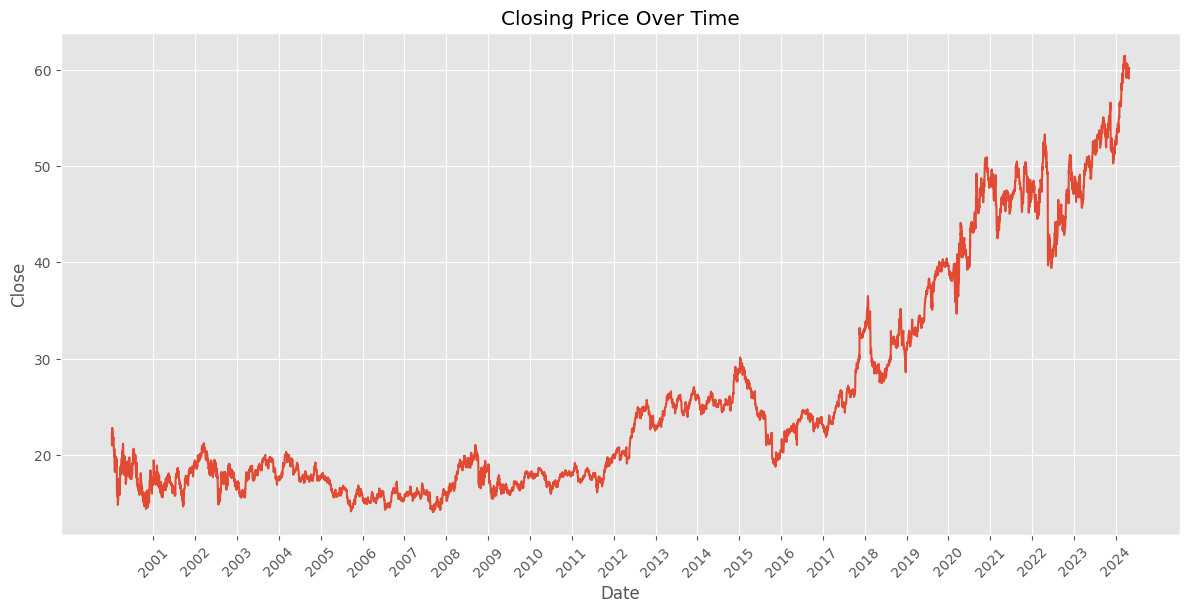

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Close')
plt.xticks(years, years.year, rotation=45)
plt.tight_layout()
plt.title('Closing Price Over Time')
plt.show()

### Volume Traded


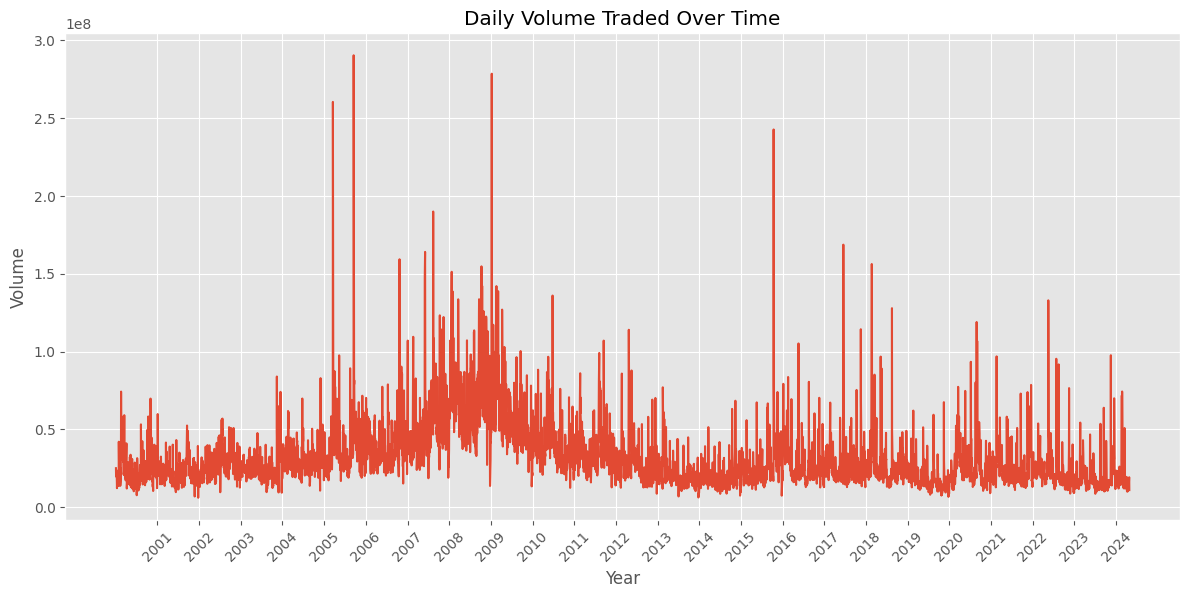

In [14]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Volume')
plt.xticks(years, years.year, rotation=45)
plt.tight_layout()
plt.title('Daily Volume Traded Over Time')
plt.xlabel('Year')
plt.show()

In [15]:
df['Month'] = df['Date'].dt.to_period('M')
df['Month'] = df['Month'].dt.to_timestamp()
Monthly_Volume = df.groupby('Month')['Volume'].sum().reset_index()

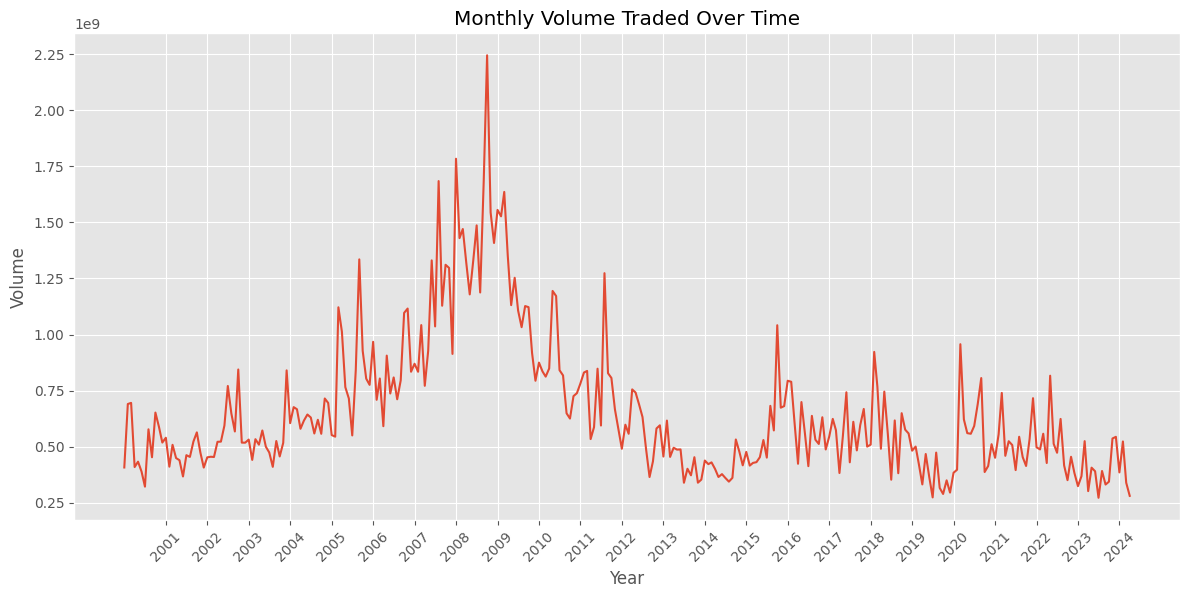

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(data=Monthly_Volume, x='Month', y='Volume')
plt.xticks(years, years.year, rotation=45)
plt.tight_layout()
plt.title('Monthly Volume Traded Over Time')
plt.xlabel('Year')
plt.show()

In [17]:
df['Year'] = df['Date'].dt.to_period('Y')
df['Year'] = df['Year'].dt.to_timestamp()
df['Year'] = df['Year'].dt.year
Yearly_Volume = df.groupby('Year')['Volume'].sum().reset_index()

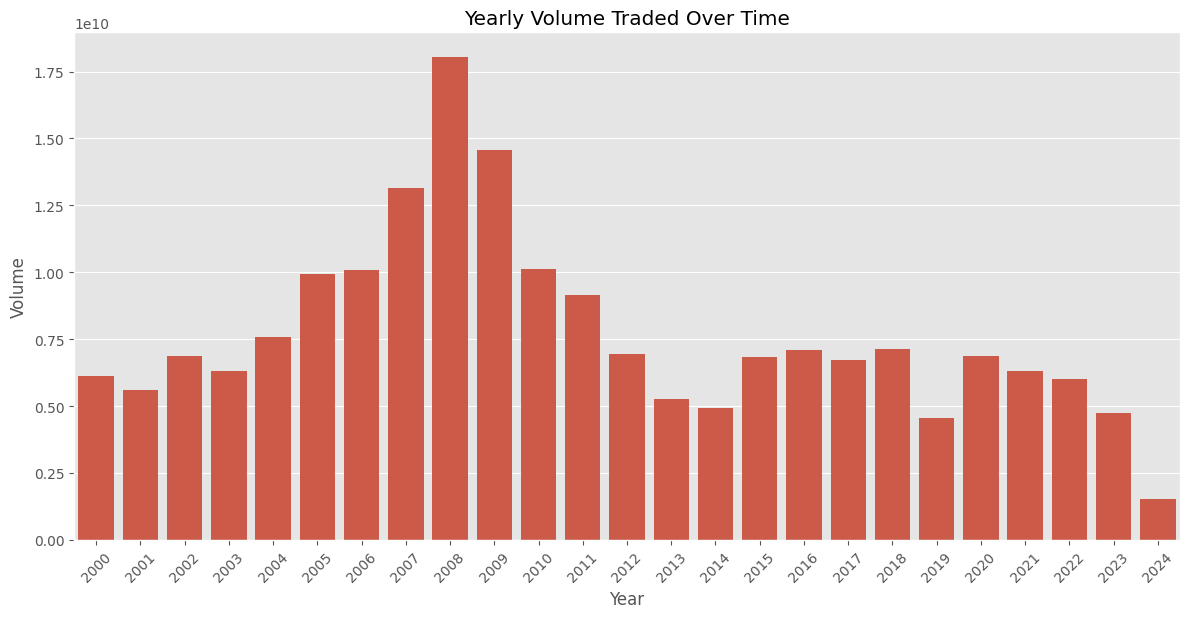

In [18]:

plt.figure(figsize=(12,6))
sns.barplot(data=Yearly_Volume, x='Year', y='Volume')
plt.tight_layout()
plt.xticks(rotation=45)
plt.title('Yearly Volume Traded Over Time')
plt.xlabel('Year')
plt.show()

### Difference Between Daily Highs and Lows


In [19]:
df['Price Range'] = df['High'] - df['Low']

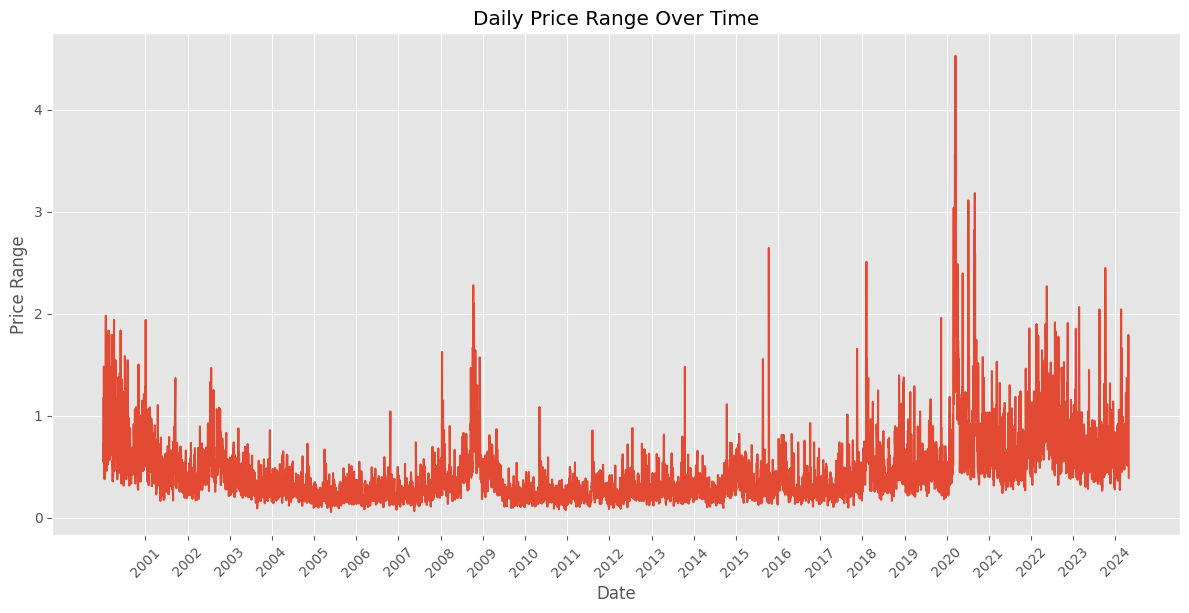

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Price Range')
plt.xticks(years, years.year, rotation=45)
plt.tight_layout()
plt.title('Daily Price Range Over Time')
plt.show()

### Comparing Moving Averages


In [21]:
df['20-day MA'] = df['Close'].rolling(window=20).mean()
df['50-day MA'] = df['Close'].rolling(window=50).mean()
df['200-day MA'] = df['Close'].rolling(window=100).mean()

In [22]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Price Range,20-day MA,50-day MA,200-day MA
0,2000-01-03,22.791668,23.000000,21.833332,22.270832,14.469358,25109700,2000-01-01,2000,1.166668,NaN,NaN,NaN
1,2000-01-04,21.833332,21.937500,21.395832,21.437500,13.927947,20235300,2000-01-01,2000,0.541668,NaN,NaN,NaN
2,2000-01-05,21.291668,21.458332,20.729168,21.000000,13.643703,21056100,2000-01-01,2000,0.729164,NaN,NaN,NaN
3,2000-01-06,21.000000,21.520832,20.895832,21.229168,13.792585,19633500,2000-01-01,2000,0.625000,NaN,NaN,NaN
4,2000-01-07,21.500000,22.979168,21.500000,22.833332,14.834813,23930700,2000-01-01,2000,1.479168,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6113,2024-04-22,59.560001,60.400002,59.040001,60.139999,60.139999,14910000,2024-04-01,2024,1.360001,59.934000,59.562000,56.332700
6114,2024-04-23,60.250000,60.349998,58.560001,59.090000,59.090000,17963900,2024-04-01,2024,1.789997,59.860000,59.615266,56.394800
6115,2024-04-24,58.980000,60.040001,58.810001,59.869999,59.869999,18529100,2024-04-01,2024,1.230000,59.828000,59.677333,56.473233
6116,2024-04-25,60.049999,60.529999,59.830002,60.209999,60.209999,19263000,2024-04-01,2024,0.699997,59.802499,59.753933,56.556367


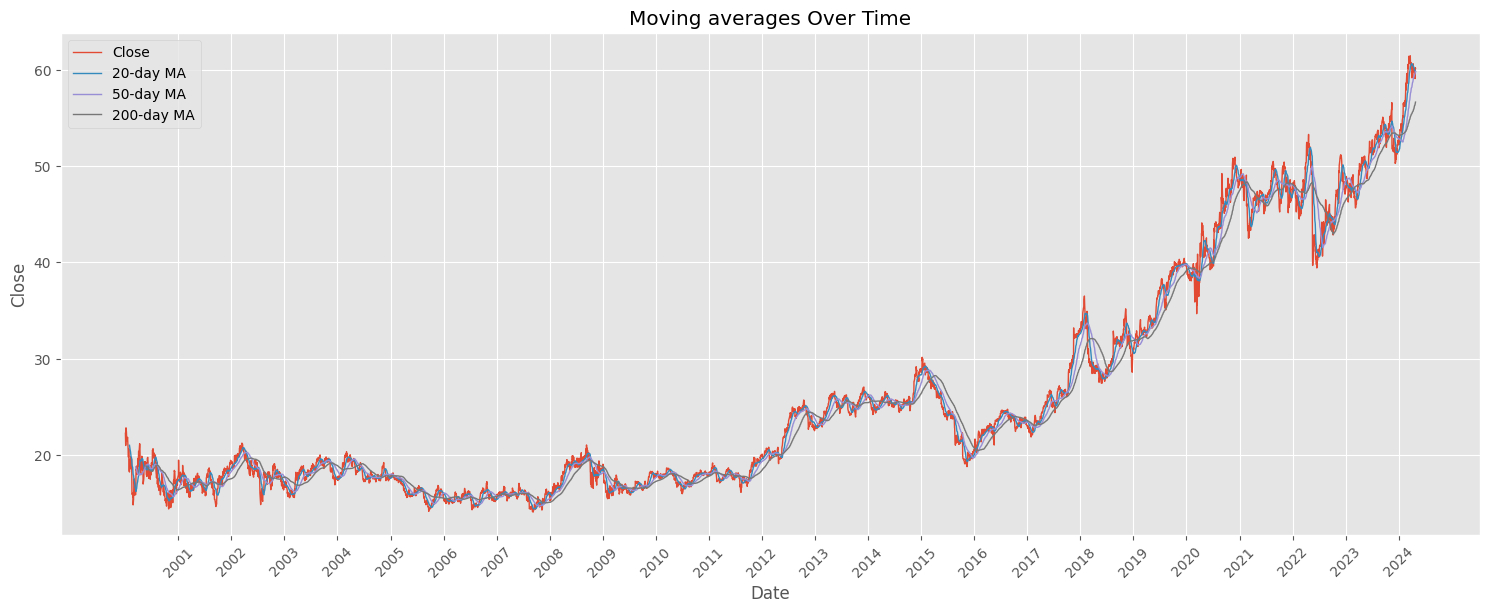

In [23]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df, x='Date', y='Close', label='Close', linewidth=1)
sns.lineplot(data=df, x='Date', y='20-day MA', label='20-day MA', linewidth=1)
sns.lineplot(data=df, x='Date', y='50-day MA', label='50-day MA', linewidth=1)
sns.lineplot(data=df, x='Date', y='200-day MA', label='200-day MA', linewidth=1)
plt.xticks(years, years.year, rotation=45)
plt.tight_layout()
plt.title('Moving averages Over Time')
plt.show()

### Comparison Between Closing And Adjusted Closing Prices


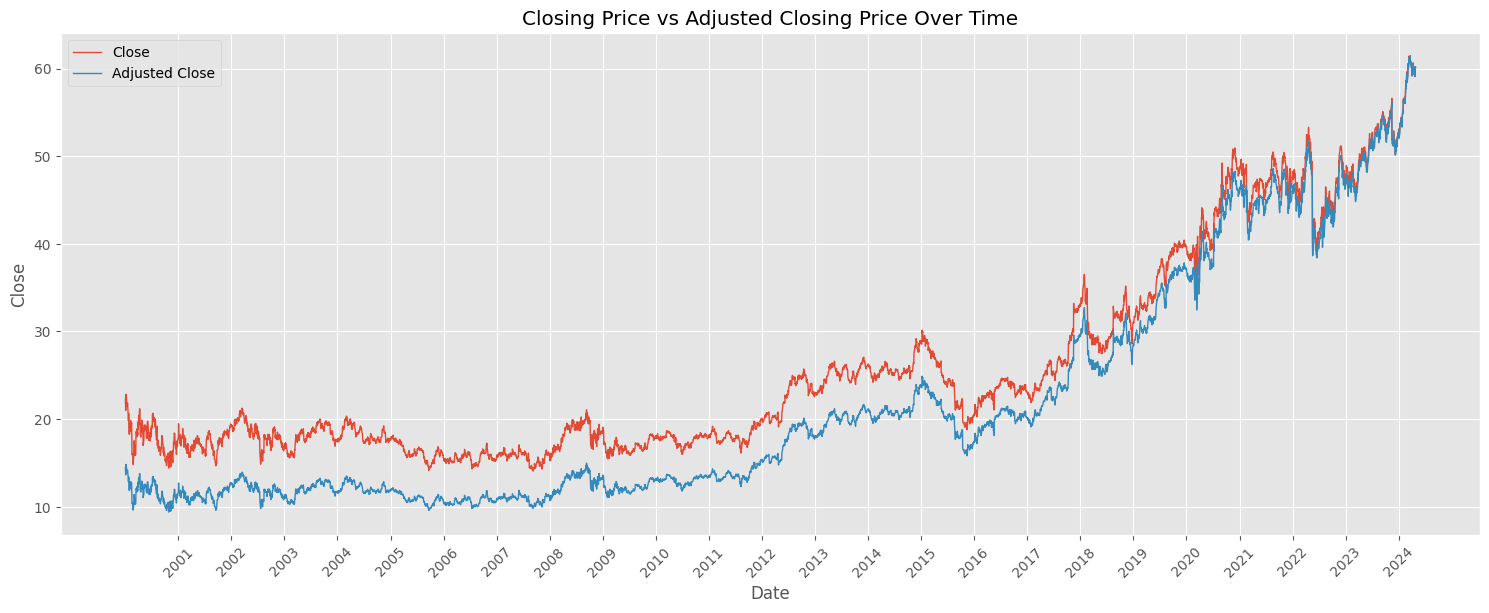

In [24]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df, x='Date', y='Close', label='Close', linewidth=1)
sns.lineplot(data=df, x='Date', y='Adj Close', label='Adjusted Close', linewidth=1)
plt.xticks(years, years.year, rotation=45)
plt.tight_layout()
plt.title('Closing Price vs Adjusted Closing Price Over Time')
plt.show()

### Daily Returns


In [25]:
df['Daily Return'] = df['Close'].pct_change()

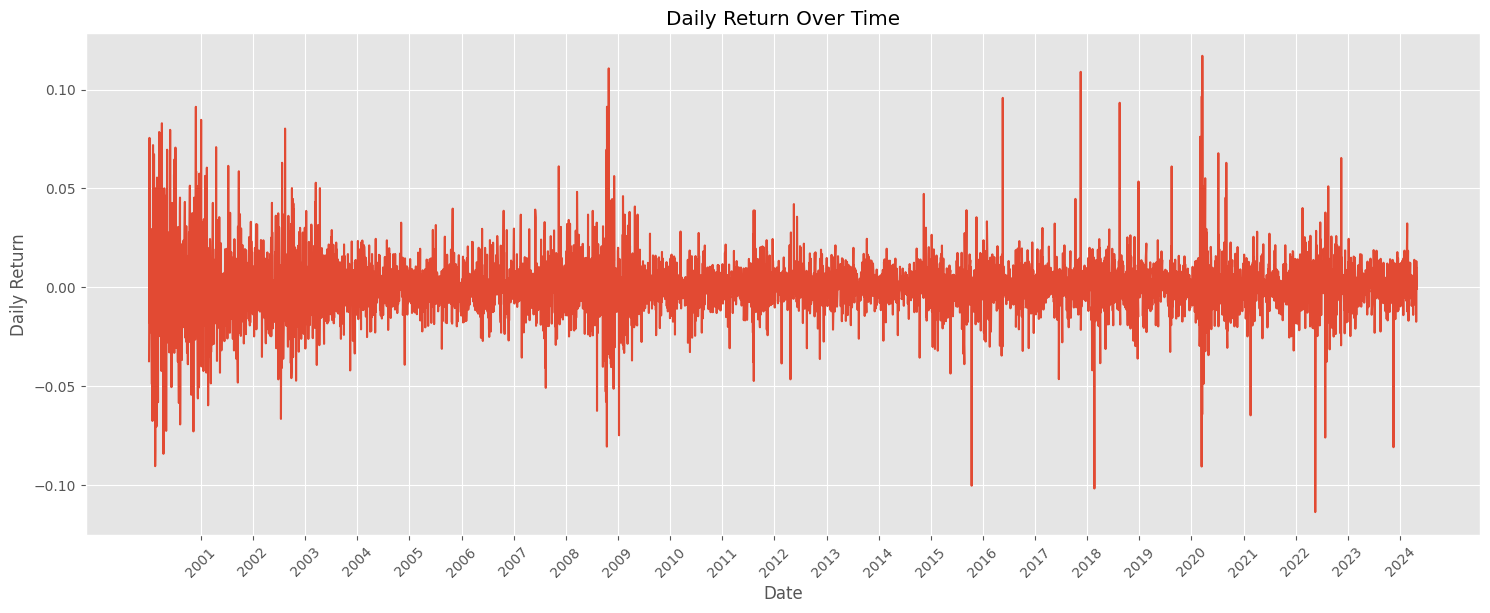

In [26]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df, x='Date', y='Daily Return')
plt.xticks(years, years.year, rotation=45)
plt.tight_layout()
plt.title('Daily Return Over Time')
plt.show()

### Yearly Returns


In [27]:
Yearly_Prices = df.groupby('Year').agg({'Close': ['first', 'last']})
Yearly_Prices.columns = ['Start_Price', 'End_Price']
Yearly_Prices['Return'] = (Yearly_Prices['End_Price'] - Yearly_Prices['Start_Price'])
Yearly_Prices.reset_index()

,Year,Start_Price,End_Price,Return
0,2000,22.270832,17.708332,-4.562500
1,2001,17.958332,19.183332,1.225000
2,2002,19.350000,16.836666,-2.513334
3,2003,17.200001,17.683332,0.483331
4,2004,17.433332,17.606667,0.173335
5,2005,17.783333,15.600000,-2.183333
6,2006,15.410000,15.393333,-0.016667
7,2007,15.850000,15.843333,-0.006667
8,2008,15.633333,18.686666,3.053333
9,2009,19.059999,17.816668,-1.243331


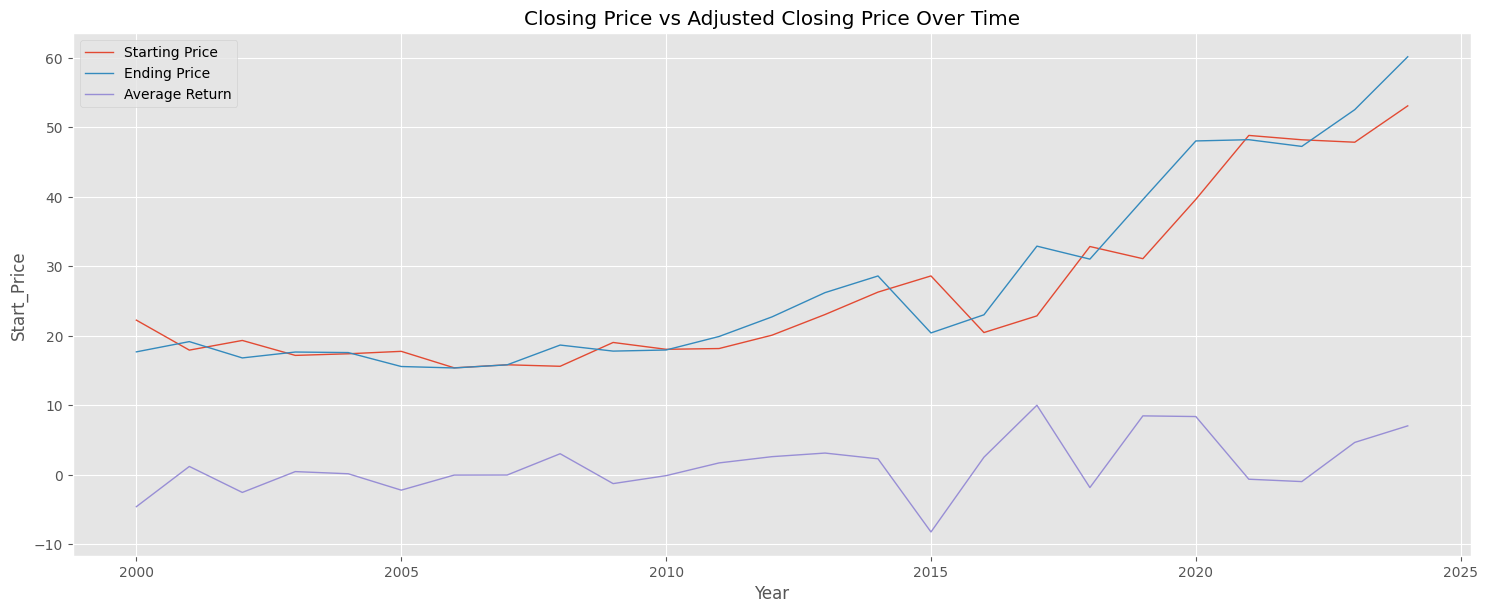

In [28]:
plt.figure(figsize=(15,6))
sns.lineplot(data=Yearly_Prices, x='Year', y='Start_Price', label='Starting Price', linewidth=1)
sns.lineplot(data=Yearly_Prices, x='Year', y='End_Price', label='Ending Price', linewidth=1)
sns.lineplot(data=Yearly_Prices, x='Year', y='Return', label='Average Return', linewidth=1)
plt.tight_layout()
plt.title('Closing Price vs Adjusted Closing Price Over Time')
plt.show()

# HEATMAP TO FIND CORRELATIONS


<Axes: >

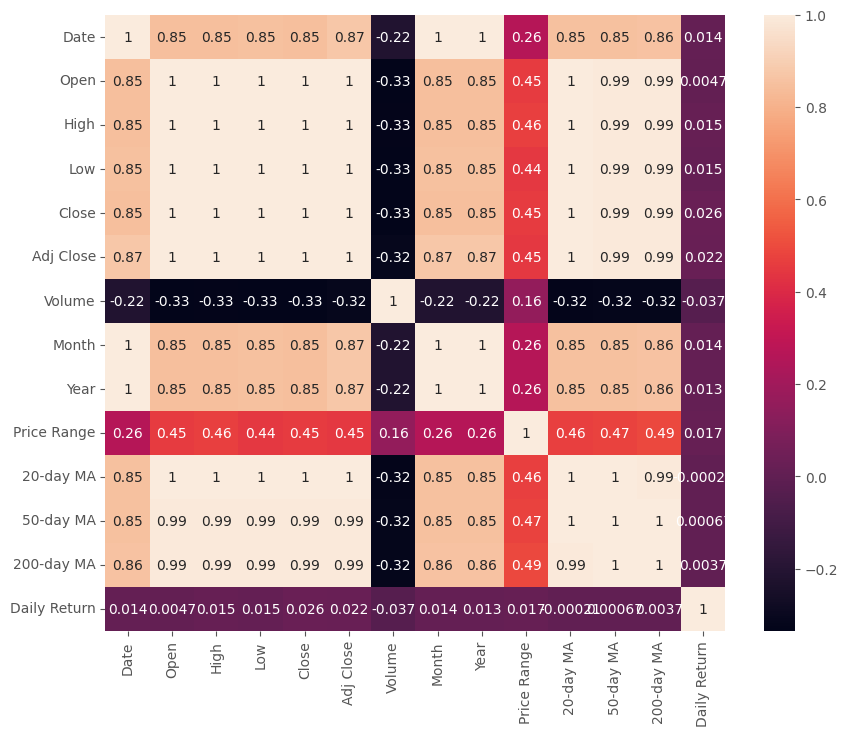

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

# MODEL PREDICTIONS


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

In [31]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,Price Range,20-day MA,50-day MA,200-day MA,Daily Return
0,2000-01-03,22.791668,23.000000,21.833332,22.270832,14.469358,25109700,2000-01-01,2000,1.166668,NaN,NaN,NaN,NaN
1,2000-01-04,21.833332,21.937500,21.395832,21.437500,13.927947,20235300,2000-01-01,2000,0.541668,NaN,NaN,NaN,-0.037418
2,2000-01-05,21.291668,21.458332,20.729168,21.000000,13.643703,21056100,2000-01-01,2000,0.729164,NaN,NaN,NaN,-0.020408
3,2000-01-06,21.000000,21.520832,20.895832,21.229168,13.792585,19633500,2000-01-01,2000,0.625000,NaN,NaN,NaN,0.010913
4,2000-01-07,21.500000,22.979168,21.500000,22.833332,14.834813,23930700,2000-01-01,2000,1.479168,NaN,NaN,NaN,0.075564


In [32]:
df_cleaned = df.drop(columns=['Adj Close', 'Month', 'Year', 'Price Range', '20-day MA', '50-day MA', '200-day MA', 'Daily Return'])

In [33]:
df_cleaned

,Date,Open,High,Low,Close,Volume
0,2000-01-03,22.791668,23.000000,21.833332,22.270832,25109700
1,2000-01-04,21.833332,21.937500,21.395832,21.437500,20235300
2,2000-01-05,21.291668,21.458332,20.729168,21.000000,21056100
3,2000-01-06,21.000000,21.520832,20.895832,21.229168,19633500
4,2000-01-07,21.500000,22.979168,21.500000,22.833332,23930700
...,...,...,...,...,...,...
6113,2024-04-22,59.560001,60.400002,59.040001,60.139999,14910000
6114,2024-04-23,60.250000,60.349998,58.560001,59.090000,17963900
6115,2024-04-24,58.980000,60.040001,58.810001,59.869999,18529100
6116,2024-04-25,60.049999,60.529999,59.830002,60.209999,19263000


In [34]:
X = df_cleaned.drop(columns=['Date', 'Close'])
y = df_cleaned['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## LINEAR REGRESSION


In [35]:
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred = LRmodel.predict(X_test)

In [37]:
print('Linear Regression Train Score is : ' ,  LRmodel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LRmodel.score(X_test, y_test))

Linear Regression Train Score is :  0.9998482339901962
Linear Regression Test Score is :  0.9998274136396704


In [38]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.022348598311354276


## RANDOM FOREST REGRESSION


In [39]:
RFmodel = RandomForestRegressor(random_state=42)
RFmodel.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
y_pred = RFmodel.predict(X_test)

In [41]:
print('Random Forest Regressor Train Score is : ' ,  RFmodel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RFmodel.score(X_test, y_test))

Random Forest Regressor Train Score is :  0.9999662003723288
Random Forest Regressor Test Score is :  0.9997536324546433


In [42]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.03190269090569554


## KNN REGRESSION


In [43]:
KNNmodel = KNeighborsRegressor(n_neighbors=5)
KNNmodel.fit(X_train, y_train)

KNeighborsRegressor()

In [44]:
y_pred = RFmodel.predict(X_test)

In [45]:
print('KNN Regression Train Score is : ' ,  LRmodel.score(X_train, y_train))
print('KNN Regression Test Score is : ' , LRmodel.score(X_test, y_test))

KNN Regression Train Score is :  0.9998482339901962
KNN Regression Test Score is :  0.9998274136396704


In [46]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.03190269090569554
